In [2]:
# Works best with jupyter-notebook

In [3]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math 
import numpy as np


import math
from spatialmath import *
from spatialmath.base import *
import spatialmath.base.symbolic as sym

import roboticstoolbox as rtb

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 5.1

Let's model a simple (1 joint) robot in 2D via the **roboticstoolbox** *elementary tranform sequence* ETS class.

In [4]:
from roboticstoolbox import ETS as ets
#help(ets)

Create a link variable a1 and a joint variable q1 for your 1 DoF robot

In [5]:
a1 = 1
q1 = math.pi/6

#### Create a transform sequence
The end effector's pose can be computed by the chain multiplication composed of a 
rotation by q1 about z and translation by a1 along x. 

The below format solves the transformation for the specific angle assigned above.

In [6]:
e = ets.rz(q1)*ets.tx(a1)
print(e)
type(e)

Rz(30°) * tx(1)


roboticstoolbox.robot.ETS.ETS

We can also set this transform sequence as a generic function by omitting the value for q1:

In [7]:
e = ets.rz()*ets.tx(a1)
print(e)

Rz(q) * tx(1)


And we can evaluate at a specific angle using the eval function. 

In this case, since we only have 1 DoF, we pass a single q array value into eval([q1]). 

In [8]:
T=e.eval([0.3])
print(T)

   0.955336   -0.29552     0           0.955336     
   0.29552     0.955336    0           0.29552      
   0           0           1           0            
   0           0           0           1            



The output of eval() is an SE3 object. We can call the ".A" attribute to convert this object into a numpy array and extract different elements or slices of the matrix. 

In [9]:
# Homogenous transformation
T.A

array([[  0.9553,  -0.2955,        0,   0.9553],
       [  0.2955,   0.9553,        0,   0.2955],
       [       0,        0,        1,        0],
       [       0,        0,        0,        1]])

Or just print the rotation matrix

In [11]:
T.R

array([[  0.9553,  -0.2955,        0],
       [  0.2955,   0.9553,        0],
       [       0,        0,        1]])

Or the translation vector:

In [12]:
T.t

array([  0.9553,   0.2955,        0])

Convert to an Euler or RPY representation...

In [13]:
print(T.eul())
print(T.rpy())

[       0        0      0.3]
[       0        0      0.3]


And plot...

<IPython.core.display.Javascript object>


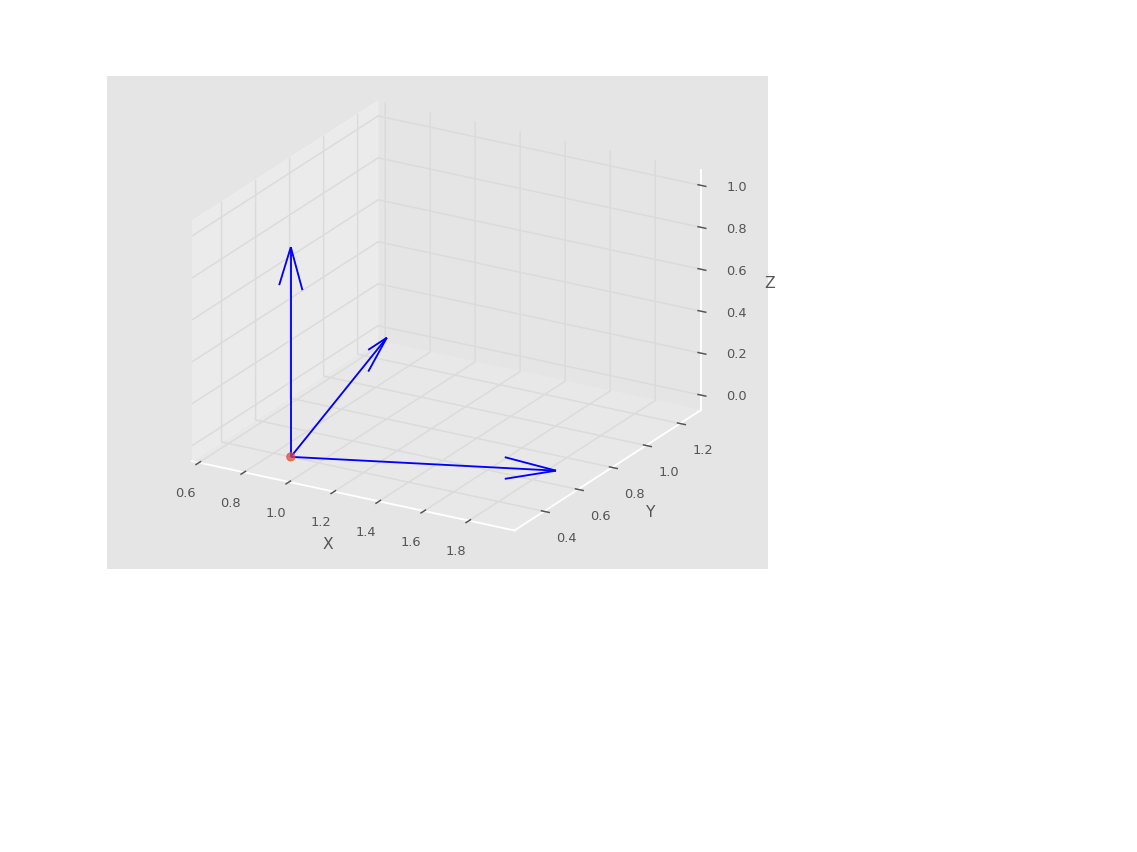

In [14]:
T.plot();

You could also create a slice of angles and then compute their corresponding transformation:

In [15]:
q = np.linspace(0,1,10)

T=list(map(e.eval,q))
print(T)

[SE3(array([[       1,        0,        0,        1],
           [       0,        1,        0,        0],
           [       0,        0,        1,        0],
           [       0,        0,        0,        1]])), SE3(array([[  0.9938,  -0.1109,        0,   0.9938],
           [  0.1109,   0.9938,        0,   0.1109],
           [       0,        0,        1,        0],
           [       0,        0,        0,        1]])), SE3(array([[  0.9754,  -0.2204,        0,   0.9754],
           [  0.2204,   0.9754,        0,   0.2204],
           [       0,        0,        1,        0],
           [       0,        0,        0,        1]])), SE3(array([[   0.945,  -0.3272,        0,    0.945],
           [  0.3272,    0.945,        0,   0.3272],
           [       0,        0,        1,        0],
           [       0,        0,        0,        1]])), SE3(array([[  0.9028,    -0.43,        0,   0.9028],
           [    0.43,   0.9028,        0,     0.43],
           [       0,        0,  

ETS allows us to look at internal transformation data, as well as the homoegenous transformation

In [16]:
print(e.data)

[namespace(T=None, axis='Rz', axis_func=<function trotz at 0x7f0443c5dee0>, eta=None, flip=False, jindex=None, joint=True), namespace(T=array([[1, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]), axis='tx', axis_func=<function ETS.tx.<locals>.axis_func at 0x7f0451d3a3a0>, eta=1, flip=False, jindex=None, joint=False)]


### Symbolic Representations

To create a symbolic representation of the homogenous transformation matrix, use the symoblix module as follows

In [24]:
a1 = sym.symbol('a1')
q1 = sym.symbol('q1')
print(a1, q1)
type(a1)

a1 q1


sympy.core.symbol.Symbol

In [25]:
e = ets.rz(q1)*ets.tx(a1)
print(e)
e.T()

Rz(q1) * tx(a1)


array([[cos(q1), -sin(q1), 0, 0],
       [sin(q1), cos(q1), 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)